# Ein bisschen Statistik über die Zugriffszeiten 

In [1]:
# diverse Importe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,10)

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [12]:
# CSV einlesen
df = pd.read_csv("ext_access1.log", sep=";", header=-1,
                 names=["ts", "SID", "RID", "call", "ip", "colX", "colY", "time", "colZ"])
# Spalte "ts" wird in datetime umgewandelt, zwecks besserem Handling 
df["ts_datetime"] = pd.to_datetime(df["ts"])

# NAN-Werte werden als "0" gesetzt
df.fillna(0, inplace=True)

# die ersten 10 Zeilen anzeigen
df.head(10)

,ts,SID,RID,call,ip,colX,colY,time,colZ,ts_datetime
0,"2018-08-06 08:09:32,146",SID_UNKNOWN,RID_1241,/gasx/extDirectAPI_pub,10.110.124.1,0,200.0,158,82.0,2018-08-06 08:09:32.146
1,"2018-08-06 08:09:32,158",SID_UNKNOWN,RID_1242,/gasx/constants,10.110.124.1,0,200.0,172,49.0,2018-08-06 08:09:32.158
2,"2018-08-06 08:09:33,212",SID_UNKNOWN,RID_1243,/gasx/nls,10.110.124.1,0,200.0,197,92.0,2018-08-06 08:09:33.212
3,"2018-08-06 08:09:34,025",0,RID_1250,0,0,EXTBASE_Login.readMandators,0.0,3,0.0,2018-08-06 08:09:34.025
4,"2018-08-06 08:09:34,043",SID_UNKNOWN,RID_1250,/gasx/extDirectAPI_pub,10.110.124.1,0,200.0,53,101.0,2018-08-06 08:09:34.043
5,"2018-08-06 08:09:34,251",0,RID_1251,0,0,EXTBASE_Login.readRoles,0.0,5,0.0,2018-08-06 08:09:34.251
6,"2018-08-06 08:09:34,253",SID_UNKNOWN,RID_1251,/gasx/extDirectAPI_pub,10.110.124.1,0,200.0,8,93.0,2018-08-06 08:09:34.253
7,"2018-08-06 08:09:42,909",0,RID_1263,0,0,EXTBASE_Login.login,0.0,70,0.0,2018-08-06 08:09:42.909
8,"2018-08-06 08:09:42,911",SID_UNKNOWN,RID_1263,/gasx/extDirectAPI_pub,10.110.124.1,0,200.0,73,91.0,2018-08-06 08:09:42.911
9,"2018-08-06 08:09:43,858",SID_UNKNOWN,RID_1266,/gasx/constants,10.110.124.1,0,200.0,9,6.0,2018-08-06 08:09:43.858


In [3]:
# unterschiedliche IP-Adressen anzeigen
df.ip.unique()

array(['10.110.124.1', 0, '10.110.113.10', '10.110.124.26',
       '10.110.124.34'], dtype=object)

In [4]:
# die calls
df.call.unique()

array(['/gasx/extDirectAPI_pub', '/gasx/constants', '/gasx/nls', 0,
       '/gasx/clipboard', '/gasx/extDirectAPI', '/gasx/dialogAcl',
       '/gasx/generateImg', '/gasx/export', '/gasx/dokva'], dtype=object)

In [49]:
df_colX = df[["colX"]]
df_colX = df_colX[df_colX["colX"] != 0]
df_colX.groupby("colX")
sorted(df_colX.colX.unique())

#TODO Anzahl



['EXTBASE_CommEndpoint.checkMigrationResults',
 'EXTBASE_CommEndpoint.readAuthTypes',
 'EXTBASE_CommEndpoint.readEndpoints',
 'EXTBASE_CommEndpoint.readProtocols',
 'EXTBASE_CommEndpoint.readSmtpEncryptions',
 'EXTBASE_CommEndpoint.readTypes',
 'EXTBASE_CommEndpoint.testEndpoint',
 'EXTBASE_CommEndpoint.updateEndpoint',
 'EXTBASE_Liste.readKlassen',
 'EXTBASE_Liste.readListGroups',
 'EXTBASE_Liste.readListen',
 'EXTBASE_Login.login',
 'EXTBASE_Login.readMandators',
 'EXTBASE_Login.readRoles',
 'EXTBASE_Merkmal.getObjectPeriods',
 'EXTBASE_Merkmal.getVariableObjekte',
 'EXTBASE_Merkmal.readKlassenItems',
 'EXTBASE_PartnerLookup.readKeyLookup',
 'EXTBASE_PartnerLookup.readLookupGridDefinition',
 'EXTBASE_PersonLookup.readKeyLookup',
 'EXTBASE_PersonLookup.readLookupGridDefinition',
 'EXTBASE_PersonZuord.createPersonZuordnung',
 'EXTBASE_PersonZuord.getObjectPeriods',
 'EXTBASE_PersonZuord.getPersonZuordnungPeriods',
 'EXTBASE_PersonZuord.getPersonZuordnungen',
 'EXTBASE_PersonZuord.readP

In [6]:
# die ext-Aufrufe
df["call2"] = df.colX.str[0:4]
df.call2.unique()

array([nan, 'EXTB', 'TME_', 'REPO', 'EXTS'], dtype=object)

In [58]:
def print_statistic(df_call_time):
    df_call_time["num_calls"] = df_call_time["time"]
    df_call_time = df_call_time[df_call_time.call != 0]
    #Anzahl Aufrufe gruppiert nach "call"
    #grouped_by_call = df_call_time.groupby(["call"]).count()
    grouped_by_call = df_call_time.groupby(["call"]).agg({'time': ['min', 'max', 'sum', "mean"], 'num_calls': 'count'})
    grouped_by_call = grouped_by_call.sort_values([("num_calls","count")], ascending=False)
    return grouped_by_call

In [59]:
df_call_time = df[["call", "time"]]
print_statistic(df_call_time).head(10)
# Statistik für "call" (nur die ersten 10, sortiert nach Anzahl Aufrufen)

time                            num_calls
                        min    max     sum        mean     count
call                                                            
/gasx/extDirectAPI        0  26799  256672   89.401602      2871
/gasx/clipboard           1    263   21020   11.626106      1808
/gasx/constants           0    172    1119    4.222642       265
/gasx/dialogAcl           6     30    2035    9.509346       214
/gasx/extDirectAPI_pub    2    158    1609    9.692771       166
/gasx/nls                62    349   14315  137.644231       104
/gasx/generateImg        60   1351   16378  207.316456        79
/gasx/dokva               4     61     184   11.500000        16
/gasx/export              2   1849    8848  589.866667        15

In [9]:
#Anzahl Requests nach Modul (EXTSYS, TME, TMESTM…) filtern
#          Und die durchschnittliche Zeit je Request dieser Gruppe.

df_call_time = df[["call2", "time"]]
#df_call_time = df_call_time[df_call_time.call2 != 0]
df_call_time.rename(columns={"call2":"call"}, inplace=True)

print_statistic(df_call_time).head(10)
# Statistik für "colX" (nur die ersten 10, sortiert nach Anzahl Aufrufen)

time                           num_calls
      min    max     sum       mean     count
call                                         
TME_    0   3362  104567  16.765592      6237
EXTB    0  26795  133819  82.706428      1618
EXTS    2    603    7337  24.955782       294
REPO    6    109    1128  17.353846        65

In [60]:
df_call_time = df[["colX", "time"]]
df_call_time.rename(columns={"colX":"call"}, inplace=True)
print_statistic(df_call_time).head(20)
# Statistik für "colX" (nur die ersten 20, sortiert nach Anzahl Aufrufen)

time                        \
                                                    min  max   sum       mean   
call                                                                            
EXTBASE_Schluessel.readValues                         2   80  2375   5.163043   
TME_CommonZaehlpunktLookup.readZaehlpunktLookup...    0   78   200   0.542005   
EXTBASE_PartnerLookup.readLookupGridDefinition        0    8   112   0.397163   
TME_ZaehlpunktGruppe.getAllZaehlpunktGruppen          1   33  1719   6.511364   
TME_CommonNetzobjektLookup.readNetzobjektLookup...    1  121   640   3.878788   
TME_CommonSearch.readCriteriaAttributes              19   80  5466  35.493506   
TME_CommonZaehlpunktLookup.readZaehlpunktKeyLookup    4   15   691   5.663934   
TME_CommonNetzobjektLookup.readNetzobjektKeyLookup    1   32   395   3.464912   
TME_Tmegrd.readGroessenDefs                           2  137  2697  26.184466   
TME_CommonPruefRegelLookup.readPruefRegelLookup...    0    2    34   0.333333   
TME_TmestmGroesse.readGroesseNachfolger              20   34  2676  26.760000   
TME_TmeCommonBusLookup.readBusLookupGridDefinition    0    3    18   0.180000   
TME_TmestmZaehlpunkt.readZaehlpunkt                   4  152  1100  11.111111   
TME_Tmeexp.readFilteredTmeExportMeldung               8  137  1844  18.816327   
TME_ZaehlpunktGruppe.getAllKategorien                 2   62   594   6.674157   
TME_TmeNotiz.readNotizBezugKeys                       0    1    23   0.261364   
TME_TmeNotiz.searchNotiz                              3  242  1009  12.156627   
TME_TmestmNetzobjekt.readNetzobjekt                   6   18   727   9.202532   
EXTBASE_Merkmal.readKlassenItems                      0    3    76   1.055556   
EXTBASE_Merkmal.getVariableObjekte                   14  100  1605  22.291667   
EXTBASE_Merkmal.getObjectPeriods                      0    4    76   1.055556   
TME_TmestmGroesse.readRechvZeitbasis                  0    5    19   0.263889   
EXTBASE_Liste.readListen                              1   21   188   2.892308   
REPORT_Report.getReportDefinitionList                 6  109  1128  17.353846   
EXTBASE_RepGen.readRepGens                            1   25   400   6.153846   
EXTBASE_ScriptUserExit.readUserExits                  2   43   592   9.107692   
EXTBASE_PersonLookup.readLookupGridDefinition         0    2    19   0.301587   
EXTBASE_ScriptDefinitionLookup.readLookupGridDe...    0    1    15   0.245902   
TME_TmestmTree.readNetzobjektTree                     0  244  3847  65.203390   
EXTSYS_Dokva.readDokv                                 2   83   231   4.052632   
...                                                 ...  ...   ...        ...   
TME_Tmeexp.readMarktrollen                            3   17   252   7.875000   
TME_TmesysWgPruefRegel.readFilteredTmePruefRege...    3   53   250   8.064516   
TME_Bus.readBusZyklen                                 2   15    94   3.133333   
TME_Zfastm.readInstanzByBusId                         5   31   211   7.033333   
TME_CommonSearch.readZaehlpunktSearchGridDefini...    0   20   185   6.379310   
EXTSYS_Dokva.getDocumentList                          2  140   959  33.068966   
TME_TmeEnvers.readRevisionsExportKanal                0   21   136   4.689655   
TME_Zfastm.readBus                                    2    5    78   2.689655   
EXTBASE_SchlLookup.readKeyLookup                      2    5    77   2.750000   
TME_Tmeexp.readComboBoxItemsForUnterart               0   15   197   7.296296   
TME_Tmerev.readRevisionsschritte                     10   53   493  18.259259   
TME_Tmegrd.readUnitGroesse                            0    8    38   1.461538   
EXTSYS_Dokva.readUnterartValues                       5   79   259  10.360000   
TME_TmeNotiz.readNotiz                                4    8   123   4.920000   
TME_TmestmGroesse.readAswbMethode                     0    0     0   0.000000   
TME_TmestmGroesse.readGroesseGW                       7   14   215   8.958333   
T

In [62]:
# Gibt es Ausreißer bzgl. Laufzeit (Histogram-Ansicht?)
df_call_time = df[["call2", "time"]]
df_call_time = df_call_time[df_call_time.call2.astype(str) != "nan"]
max_time = df_call_time.time.max()
num_bins = 10
bin_edge = max_time / num_bins
bins = [bin_edge*i for i in range(0,num_bins+1) ]
all_hists = []
labels = []
for call in df_call_time.call2.unique():
    all_hists.append(df_call_time[df_call_time["call2"]==call].time.tolist())
    labels.append(call)

plt.hist(all_hists, bins=bins, stacked=False,  alpha = 0.5, log=True, label=labels)

plt.legend()
plt.tight_layout()
plt.show()

KeyError: "['call2'] not in index"

In [12]:
# Anzeigen der Ausreßer:
schwelle = 5000
df[df["time"] > schwelle]

,ts,SID,RID,call,ip,colX,colY,time,colZ,ts_datetime,call2
1334,"2018-08-06 09:13:08,746",0,RID_6052,0,0,EXTBASE_Workspace.getMenu,0.0,5924,0.0,2018-08-06 09:13:08.746,EXTB
1335,"2018-08-06 09:13:08,749",SID_1533539581066,RID_6052,/gasx/extDirectAPI,10.110.113.10,0,200.0,5928,6.0,2018-08-06 09:13:08.749,NaN
2103,"2018-08-06 09:26:09,559",SID_1533535782666,RID_7164,/gasx/extDirectAPI,10.110.124.1,0,200.0,8974,7.0,2018-08-06 09:26:09.559,NaN
2132,"2018-08-06 09:26:29,682",SID_1533535782666,RID_7198,/gasx/extDirectAPI,10.110.124.1,0,200.0,8965,7.0,2018-08-06 09:26:29.682,NaN
2174,"2018-08-06 09:38:40,277",SID_1533535782666,RID_8538,/gasx/extDirectAPI,10.110.124.1,0,200.0,5021,7.0,2018-08-06 09:38:40.277,NaN
4858,"2018-08-06 10:47:08,362",0,RID_1283,0,0,EXTBASE_Workspace.getMenu,0.0,7399,0.0,2018-08-06 10:47:08.362,EXTB
4859,"2018-08-06 10:47:08,365",SID_1533545218923,RID_1283,/gasx/extDirectAPI,10.110.113.10,0,200.0,7402,6.0,2018-08-06 10:47:08.365,NaN
5005,"2018-08-06 10:49:45,657",0,RID_1371,0,0,EXTBASE_Workspace.readMenuListItems,0.0,10554,0.0,2018-08-06 10:49:45.657,EXTB
5006,"2018-08-06 10:49:45,660",SID_1533545218923,RID_1371,/gasx/extDirectAPI,10.110.113.10,0,200.0,10558,5.0,2018-08-06 10:49:45.660,NaN
5057,"2018-08-06 10:51:07,151",0,RID_2243,0,0,EXTBASE_Workspace.getMenu,0.0,26795,0.0,2018-08-06 10:51:07.151,EXTB


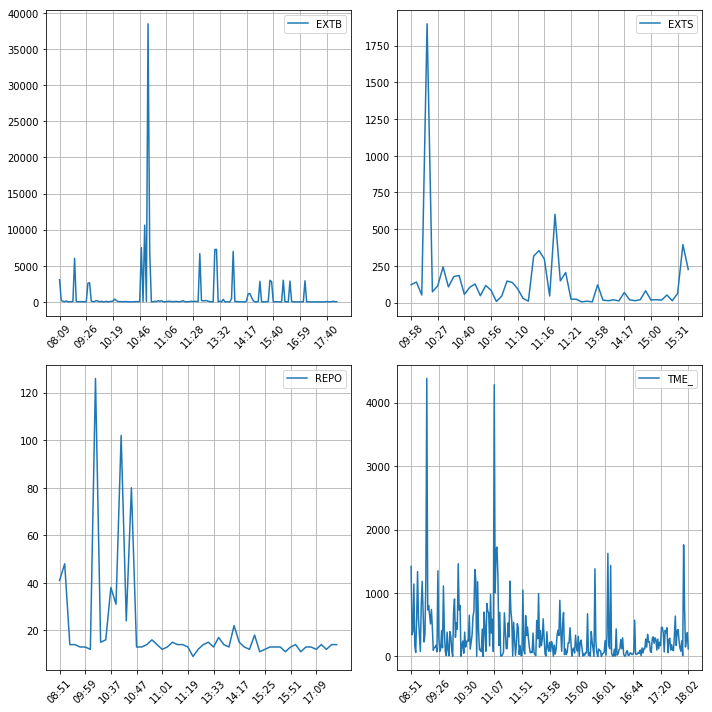

In [33]:
#Anzahl Requests pro Zeit (Bedienerzeiten erkennen)
# Wenn kein Request 10 minuten ankam wäre es ja eine Grundlast – ich würde dann ein anderes Log ggf. dagegenhalten)
df_call_time = df[["call2", "time","ts"]]
df_call_time = df_call_time[df_call_time.call2.astype(str) != "nan"]

df_call_time["ts"] = df_call_time["ts"].str[0:16]
df_call_time.sort_values(["call2","ts"], inplace=True)
df_call_time = df_call_time.groupby(["call2","ts"]).agg({"time":"sum"})
df_call_time.reset_index(inplace=True)
df_call_time
num = 221
plt.figure(1)
for call in df_call_time.call2.unique():
    df_call_time_subset = df_call_time[df_call_time["call2"]==call]
    plt.subplot(num)
    num += 1
#    print(df_call_time_subset)
    step_length = len(df_call_time_subset)//10
    plt.plot(df_call_time_subset["ts"].tolist(), df_call_time_subset["time"].tolist(), label=str(call))    
    plt.xticks(df_call_time_subset["ts"].tolist()[0::step_length], df_call_time_subset["ts"].str[11:16].tolist()[0::step_length], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()

In [37]:
#Zu häufigste Requests erkennen (und 2x hintereinander mit <1 Sekunde Abweichung)
df_call_time = df[["ts_datetime", "colX", "time", "RID"]]
df_call_time["ts_datetime_plus_x"] = df_call_time["ts_datetime"] + pd.Timedelta('2 second')
df_call_time = df_call_time[df_call_time["colX"] != 0]
df_call_time.sort_values(["RID", "colX", "ts_datetime"], inplace=True)
df_call_time["colX_shift"] = df_call_time["colX"].shift()
df_call_time["RID_shift"] = df_call_time["RID"].shift()
df_call_time["ts_datetime_shift"] = df_call_time["ts_datetime"].shift()
df_call_time = df_call_time[(df_call_time["colX_shift"] == df_call_time["colX"]) & (df_call_time["RID_shift"] == df_call_time["RID"]) & (df_call_time["ts_datetime_shift"] <= df_call_time["ts_datetime_plus_x"])]

df_call_time = df_call_time[["ts_datetime", "colX", "time", "RID"]]

df_call_time["ts_minute"] = df_call_time["ts_datetime"].astype(str).str[0:16]
#Anzahl gleicher Aufrufe gruppiert nach "ts_minute"
grouped_by_call = df_call_time.groupby(["colX", "RID","ts_minute"]).agg({'time': ['min', 'max', 'sum', "mean", "count"]})
grouped_by_call = grouped_by_call.sort_values([("time","count")], ascending=False)
grouped_by_call.to_csv("mk/mehrfache_aufrufe.csv")
grouped_by_call

time  \
                                                                               min   
colX                                               RID       ts_minute               
TME_ZaehlpunktGruppe.getAllZaehlpunktGruppen       RID_989   2018-08-06 10:40    2   
                                                   RID_3029  2018-08-06 10:53    1   
                                                   RID_9618  2018-08-06 09:56    2   
                                                   RID_929   2018-08-06 10:40    1   
                                                   RID_833   2018-08-06 10:38    1   
                                                   RID_770   2018-08-06 10:37    1   
                                                   RID_11447 2018-08-06 15:40    2   
                                                   RID_1171  2018-08-06 10:44    1   
                                                   RID_1095  2018-08-06 10:42    4   
                                                   RID_12019 2018-08-06 16:16    2   
                                                   RID_1228  2018-08-06 10:44    1   
                                                   RID_1140  2018-08-06 10:42    1   
EXTBASE_Schluessel.readValues                      RID_14558 2018-08-06 17:09    2   
                                                   RID_8549  2018-08-06 14:17    2   
                                                   RID_1295  2018-08-06 10:47    2   
                                                   RID_9657  2018-08-06 09:58    2   
TME_CommonSearch.readCriteriaAttributes            RID_11447 2018-08-06 15:40   21   
                                                   RID_1140  2018-08-06 10:42   21   
                                                   RID_1095  2018-08-06 10:42   19   
EXTBASE_Schluessel.readValues                      RID_7734  2018-08-06 13:40    2   
TME_CommonSearch.readCriteriaAttributes            RID_12019 2018-08-06 16:16   22   
                                                   RID_1171  2018-08-06 10:44   20   
                                                   RID_1228  2018-08-06 10:44   28   
                                                   RID_770   2018-08-06 10:37   29   
                                                   RID_833   2018-08-06 10:38   24   
                                                   RID_929   2018-08-06 10:40   23   
                                                   RID_9618  2018-08-06 09:56   25   
                                                   RID_989   2018-08-06 10:40   22   
                                                   RID_3029  2018-08-06 10:53   20   
TME_ZaehlpunktGruppe.getAllKategorien              RID_11447 2018-08-06 15:40    2   
...                                                                            ...   
EXTBASE_Schluessel.readValues                      RID_1095  2018-08-06 10:42    2   
TME_CommonZaehlpunktLookup.readZaehlpunktLookup... RID_5433  2018-08-06 09:07    0   
TME_TmeNotiz.getBetreff                            RID_8524  2018-08-06 14:16    3   
                                                   RID_7975  2018-08-06 13:53    4   
                                                   RID_7972  2018-08-06 13:52    4   
                                                   RID_4484  2018-08-06 08:54    4   
                                                   RID_4367  2018-08-06 08:52    4   
                                                   RID_4344  2018-08-06 08:52    3   
                                                   RID_4288  2018-08-06 08:51   10   
                                                   RID_3762  2018-08-06 11:13    5   
TME_StoerMeldungen.readStatusKeys                  RID_9009  2018-08-06 14:47    1   
TME_DelAdresseLookup.readKeyLookup                 RID_5914  2018-08-06 09:12    7   
EXTBASE_PersonLookup.readLookupGridDefinition      RID_14883 2018-08-06 17:25    0   
                                    

In [46]:
#Micha
# Anzahl
df_shape = df.ts.count()

df_min = df.ts_datetime.min() 
df_max = df.ts_datetime.max() 

dauer = df_max - df_min

print ("Anzahl: ", df_shape, "\n Start: ", df_min, "\n   End: ", df_max, "\n Dauer: ", dauer)





Anzahl:  13752 
 Start:  2018-08-06 08:09:32.146000 
   End:  2018-08-06 18:02:17.367000 
 Dauer:  0 days 09:52:45.221000
